<a href="https://colab.research.google.com/github/Asmoday-McK/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [19]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Asmoday-McK/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

df.head()


,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


I'm going to predict that exercise time and weight will be correlated, as well as potentially age vs exercise time, as we all know as we get older, we lose energy, and cannot exercise as much as we used to be able to.

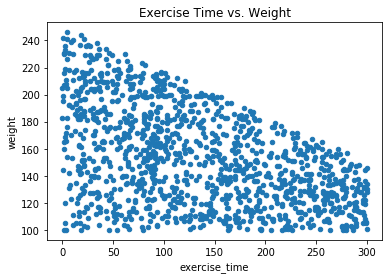

In [23]:
df.plot(kind = 'scatter', x = 'exercise_time', y = 'weight', title = 'Exercise Time vs. Weight'); 

# This is not surprising, let's look at a few other values.

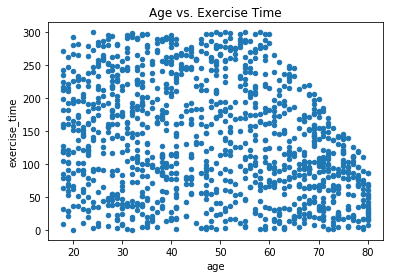

In [25]:
df.plot(kind = 'scatter', x = 'age', y = 'exercise_time', title = 'Age vs. Exercise Time');

# OK, so this tells us that up until approximately age 60, exercise time is stable across the board, at which point, it drops off. This is to be expected and should be considered a variable when considering data.

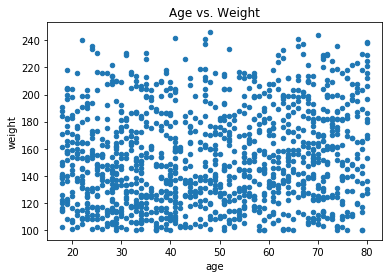

In [27]:
df.plot(kind = 'scatter', x = 'age', y = 'weight', title = 'Age vs. Weight');

# Looks like there is very little correlation between age and weight.

In [50]:
# Just like in lesson, I'm going to put into bins.

bins1 = pd.cut(df['exercise_time'], 10)
pd.crosstab(bins1, df['weight'])

# Again, looks like a direct correlation!

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-0.3, 30.0]",3,0,1,1,1,3,0,0,0,1,1,1,0,2,0,0,1,1,0,1,2,0,0,1,1,0,1,3,0,1,0,2,0,2,0,1,1,0,0,0,...,2,2,3,1,1,2,0,2,2,1,1,2,0,3,2,3,1,0,0,0,0,1,0,2,0,1,2,2,2,1,0,3,2,0,1,1,2,1,1,1
"(30.0, 60.0]",2,0,0,0,1,0,1,0,1,1,1,1,2,2,1,0,2,2,1,1,0,0,1,0,2,1,1,2,1,0,2,0,0,0,0,0,1,1,0,3,...,2,3,0,2,0,2,4,2,0,2,1,2,1,3,0,2,1,0,0,2,0,0,1,1,1,0,3,0,1,0,2,0,0,1,0,0,0,0,0,0
"(60.0, 90.0]",1,1,2,1,1,0,0,1,2,1,2,0,1,2,1,0,3,0,1,0,0,1,4,2,0,0,1,0,1,2,0,2,1,1,2,4,1,1,2,2,...,1,2,1,0,0,2,1,1,0,2,1,4,0,1,0,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
"(90.0, 120.0]",0,0,0,1,1,0,2,1,0,3,2,0,0,1,1,0,1,2,0,2,0,3,1,1,4,2,2,0,2,2,1,1,1,0,0,0,3,2,0,1,...,3,5,1,1,1,3,1,2,2,2,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(120.0, 150.0]",0,1,2,0,1,0,0,2,3,1,4,2,2,2,1,2,0,0,1,2,2,0,0,0,3,1,1,0,0,1,0,0,1,1,1,1,0,2,0,1,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(150.0, 180.0]",1,1,1,2,0,2,2,2,3,2,1,1,0,0,2,0,2,0,0,0,1,1,0,1,3,4,3,1,1,0,0,2,0,0,1,2,2,3,5,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(180.0, 210.0]",2,3,0,0,0,1,1,2,2,2,2,0,0,2,1,2,2,3,1,0,0,1,2,0,0,1,3,0,2,2,1,1,1,1,1,0,3,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(210.0, 240.0]",2,2,3,0,2,0,0,1,2,2,0,2,1,3,0,0,1,0,1,2,2,2,0,2,2,2,1,1,3,3,0,3,1,0,1,2,2,4,3,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"(240.0, 270.0]",1,1,1,0,1,1,1,2,3,0,0,1,2,2,1,3,3,2,0,1,3,0,2,2,0,6,2,8,3,2,1,0,1,3,1,2,0,4,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
pd.crosstab(bins1, df['age'])

# Again, it appears there is a direct correlation between exercise time and age.

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
exercise_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-0.3, 30.0]",1,3,1,0,1,3,1,2,0,2,0,4,3,1,3,1,2,4,3,2,0,1,4,3,0,2,0,1,1,3,2,2,1,3,1,1,1,3,0,2,2,3,0,5,4,3,1,5,3,3,3,2,2,8,2,4,9,1,3,4,2,4,8
"(30.0, 60.0]",1,2,1,2,3,1,2,2,1,3,5,4,4,2,3,2,6,2,1,1,5,1,0,5,0,1,2,0,1,3,2,2,1,1,2,2,1,2,0,1,1,1,1,0,1,2,2,1,2,3,2,3,2,4,2,4,1,0,4,1,1,5,6
"(60.0, 90.0]",3,4,3,0,3,2,2,0,1,0,2,0,4,0,2,1,1,2,1,1,4,3,2,5,0,3,4,0,1,4,1,1,1,2,3,1,0,2,2,3,6,1,3,5,2,2,3,3,5,3,3,4,4,4,2,6,6,4,5,2,7,5,5
"(90.0, 120.0]",3,4,1,2,2,2,1,2,2,0,1,1,1,1,2,4,2,3,4,1,6,3,3,4,0,0,4,0,0,4,1,1,1,2,2,0,1,3,3,3,0,2,3,3,0,3,6,2,2,6,6,1,5,4,7,2,1,6,3,5,4,1,0
"(120.0, 150.0]",2,1,0,2,4,4,2,1,2,1,1,2,1,3,2,3,1,2,0,0,1,0,0,4,0,1,0,3,1,2,1,0,1,3,4,1,2,1,1,2,0,3,1,1,2,2,2,1,1,1,0,8,1,4,2,2,3,7,1,1,0,0,0
"(150.0, 180.0]",2,2,3,4,2,3,3,1,0,3,3,2,3,3,2,1,2,3,0,4,4,3,0,2,2,1,3,0,2,1,1,2,2,1,2,1,1,2,3,2,3,2,1,3,1,2,0,0,2,4,3,6,4,2,3,1,0,0,0,0,0,0,0
"(180.0, 210.0]",2,2,3,1,3,1,2,3,2,1,3,4,0,0,3,3,7,1,2,1,1,2,2,0,0,1,2,1,1,0,2,3,1,3,1,1,0,1,3,4,0,1,1,3,2,3,2,1,0,0,2,4,1,1,0,0,0,0,0,0,0,0,0
"(210.0, 240.0]",4,3,1,5,1,3,1,3,1,0,5,5,2,1,0,5,4,0,2,1,0,3,3,5,1,0,0,2,2,2,0,2,0,2,0,0,3,4,1,3,0,3,1,1,2,2,5,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
"(240.0, 270.0]",1,2,2,1,0,1,1,3,4,3,3,2,3,5,0,3,2,1,2,1,2,3,3,2,5,3,4,3,1,1,4,5,3,3,1,2,0,3,3,2,0,2,0,1,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
pd.crosstab(df['age'], df['weight'])

# Again, very little correlation.

weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. 

Continuous variables: Age, Exercise_Time 

Possible Confounding variables: Health Conditions, Diet

2. Relationships are as follows:
Age and Exercise Time are related. I infer that this is because as we get older, we have less energy too exercise.
Weight and Exercise Time have great relation. The more a person exercises, the better chances of their weight being healthy.

3. The "real" relationships are age and exercise time, because what I inferred above definitely plays a part in the results. Also included in the "real" relationships are weight and exercise time. The spurious relationships are age and weight because it does not factor in growth or the expected weight of a person of a specific age, as well as build.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)